<a href="https://colab.research.google.com/github/CDspana/Restaurant-Revenue-Prediction/blob/main/Restaurant_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Oct 17 21:45:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.shape, test.shape

((137, 43), (100000, 42))

In [ ]:
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.00,4.00,4.00,2,...,3.00,5,3,4,5,5,4,3,4,5653753.00
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.00,4.00,4.00,1,...,3.00,0,0,0,0,0,0,0,0,6923131.00
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.00,2.00,5.00,2,...,3.00,0,0,0,0,0,0,0,0,2055379.00
3,3,02/02/2012,Tokat,Other,IL,6,4.50,6.00,6.00,4,...,7.50,25,12,10,6,18,12,12,6,2675511.00
4,4,05/09/2009,Gaziantep,Other,IL,3,4.00,3.00,4.00,2,...,3.00,5,1,3,2,3,4,3,3,4316715.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.00,3.00,5.00,4,...,3.00,0,0,0,0,0,0,0,0,5787594.00
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.00,4.00,4.00,2,...,3.00,0,0,0,0,0,0,0,0,9262754.00
134,134,07/08/2006,Kayseri,Other,FC,3,4.00,4.00,4.00,2,...,3.00,0,0,0,0,0,0,0,0,2544857.00
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.00,4.00,5.00,2,...,3.00,0,0,0,0,0,0,0,0,7217634.00


In [ ]:
train.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [ ]:
train['Open Date'] = pd.to_datetime(train['Open Date'])
test['Open Date'] = pd.to_datetime(test['Open Date'])

In [ ]:
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.00,4.00,4.00,2,...,3.00,5,3,4,5,5,4,3,4,5653753.00
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.00,4.00,4.00,1,...,3.00,0,0,0,0,0,0,0,0,6923131.00
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.00,2.00,5.00,2,...,3.00,0,0,0,0,0,0,0,0,2055379.00
3,3,2012-02-02,Tokat,Other,IL,6,4.50,6.00,6.00,4,...,7.50,25,12,10,6,18,12,12,6,2675511.00
4,4,2009-05-09,Gaziantep,Other,IL,3,4.00,3.00,4.00,2,...,3.00,5,1,3,2,3,4,3,3,4316715.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008-06-25,Trabzon,Other,FC,2,3.00,3.00,5.00,4,...,3.00,0,0,0,0,0,0,0,0,5787594.00
133,133,2006-10-12,İzmir,Big Cities,FC,4,5.00,4.00,4.00,2,...,3.00,0,0,0,0,0,0,0,0,9262754.00
134,134,2006-07-08,Kayseri,Other,FC,3,4.00,4.00,4.00,2,...,3.00,0,0,0,0,0,0,0,0,2544857.00
135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.00,4.00,5.00,2,...,3.00,0,0,0,0,0,0,0,0,7217634.00


In [ ]:
test

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,2011-01-22,Niğde,Other,FC,1,4.00,4.00,4.00,1,...,2.00,3.00,0,0,0,0,0,0,0,0
1,1,2011-03-18,Konya,Other,IL,3,4.00,4.00,4.00,2,...,1.00,3.00,0,0,0,0,0,0,0,0
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.00,4.00,4.00,2,...,2.00,3.00,0,0,0,0,0,0,0,0
3,3,2013-05-06,Kocaeli,Other,IL,2,4.00,4.00,4.00,2,...,2.00,3.00,0,4,0,0,0,0,0,0
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.00,4.00,4.00,1,...,5.00,3.00,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2000-01-05,Antalya,Other,FC,5,5.00,4.00,4.00,2,...,2.00,3.00,0,0,0,0,0,0,0,0
99996,99996,2011-07-18,Niğde,Other,IL,1,2.00,4.00,3.00,1,...,1.00,3.00,5,0,0,0,4,0,0,0
99997,99997,2012-12-29,İstanbul,Big Cities,IL,4,5.00,4.00,4.00,1,...,4.00,1.00,5,5,3,2,4,4,4,2
99998,99998,2013-10-12,İstanbul,Big Cities,FC,12,7.50,6.00,6.00,4,...,7.50,5.00,0,0,0,4,0,0,0,0


In [ ]:
test.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Id          100000 non-null  int64         
 1   Open Date   100000 non-null  datetime64[ns]
 2   City        100000 non-null  object        
 3   City Group  100000 non-null  object        
 4   Type        100000 non-null  object        
 5   P1          100000 non-null  int64         
 6   P2          100000 non-null  float64       
 7   P3          100000 non-null  float64       
 8   P4          100000 non-null  float64       
 9   P5          100000 non-null  int64         
 10  P6          100000 non-null  int64         
 11  P7          100000 non-null  int64         
 12  P8          100000 non-null  int64         
 13  P9          100000 non-null  int64         
 14  P10         100000 non-null  int64         
 15  P11         100000 non-null  int64         
 16  P12

In [ ]:
numerical_features = train.select_dtypes(include=[np.number]).columns.tolist()
numerical_features

['Id',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'revenue']

In [ ]:
categorical_features = train.select_dtypes(exclude=[np.number,np.datetime64]).columns.tolist()
categorical_features

['City', 'City Group', 'Type']

# 2. Data Exploration

**Analyzing Numerical Variables**

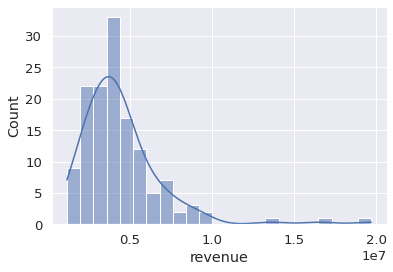

In [ ]:
sns.histplot(data = train['revenue'], kde = True)

**En el histograma se observa que la variable objetivo tiene una distribución sesgada hacia la derecha. Existen valores atipicos con ingresos mayores a 10000000 que afectaran el resultado. Por lo tanto, se eliminaran del conjunto de datos.**

In [ ]:
train[train['revenue'] > 10000000]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
16,16,2000-01-07,İstanbul,Big Cities,FC,3,5.00,4.00,4.00,2,...,2.00,0,0,0,0,0,0,0,0,19696939.00
75,75,2005-10-15,İstanbul,Big Cities,FC,5,5.00,4.00,5.00,1,...,0.00,0,0,0,0,0,0,0,0,16549064.00
99,99,1999-12-18,İstanbul,Big Cities,IL,4,5.00,4.00,4.00,2,...,1.00,5,5,4,2,5,5,5,3,13575224.00


In [ ]:
train = train[train['revenue'] < 10000000 ]
#train.drop(['Id'], inplace = True, axis = 1)
train.reset_index(drop=True, inplace = True)
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.00,4.00,4.00,2,...,3.00,5,3,4,5,5,4,3,4,5653753.00
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.00,4.00,4.00,1,...,3.00,0,0,0,0,0,0,0,0,6923131.00
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.00,2.00,5.00,2,...,3.00,0,0,0,0,0,0,0,0,2055379.00
3,3,2012-02-02,Tokat,Other,IL,6,4.50,6.00,6.00,4,...,7.50,25,12,10,6,18,12,12,6,2675511.00
4,4,2009-05-09,Gaziantep,Other,IL,3,4.00,3.00,4.00,2,...,3.00,5,1,3,2,3,4,3,3,4316715.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,132,2008-06-25,Trabzon,Other,FC,2,3.00,3.00,5.00,4,...,3.00,0,0,0,0,0,0,0,0,5787594.00
130,133,2006-10-12,İzmir,Big Cities,FC,4,5.00,4.00,4.00,2,...,3.00,0,0,0,0,0,0,0,0,9262754.00
131,134,2006-07-08,Kayseri,Other,FC,3,4.00,4.00,4.00,2,...,3.00,0,0,0,0,0,0,0,0,2544857.00
132,135,2010-10-29,İstanbul,Big Cities,FC,4,5.00,4.00,5.00,2,...,3.00,0,0,0,0,0,0,0,0,7217634.00


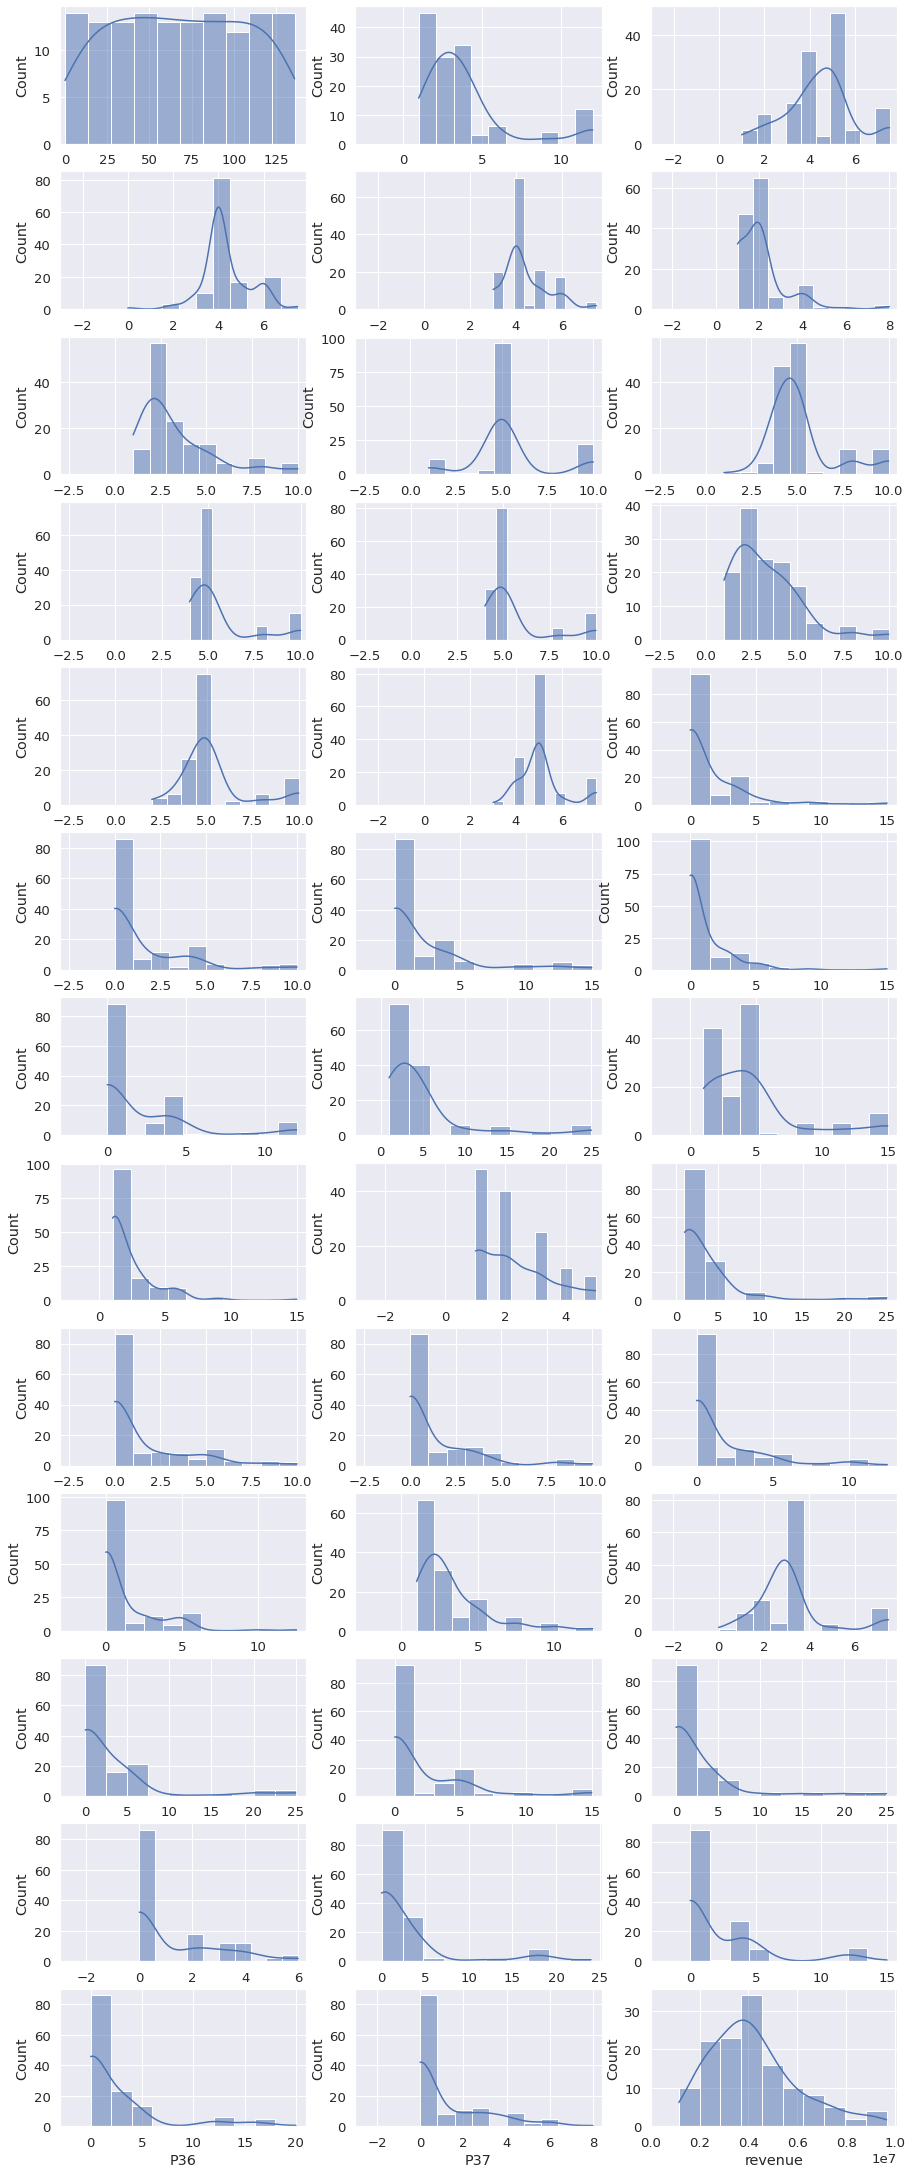

In [ ]:
k = len(numerical_features)
n = 3
m = (k - 1) // n + 1 
fig, ax = plt.subplots(m, n, figsize=(n * 5, m * 3))
for num_colum, subplot in zip(numerical_features, ax.flatten()):
  sns.histplot(data = train[num_colum], kde = True, ax=subplot, bins = 10).set(xlim=(-3, None))

Las anteriores distribuciones muestran anomalias en algunas caracteristicas, la cuales deben ser estudiadas con un experto en el campo. Al observar la caracteristica P37 esta posee muchos valores en 0. Es probable que se trate de un error de introducción de datos o de que el número cero represente algo importante.

In [ ]:
train[train['P37'] == 0].shape

(86, 43)

**Analyzing Categorical Variables**



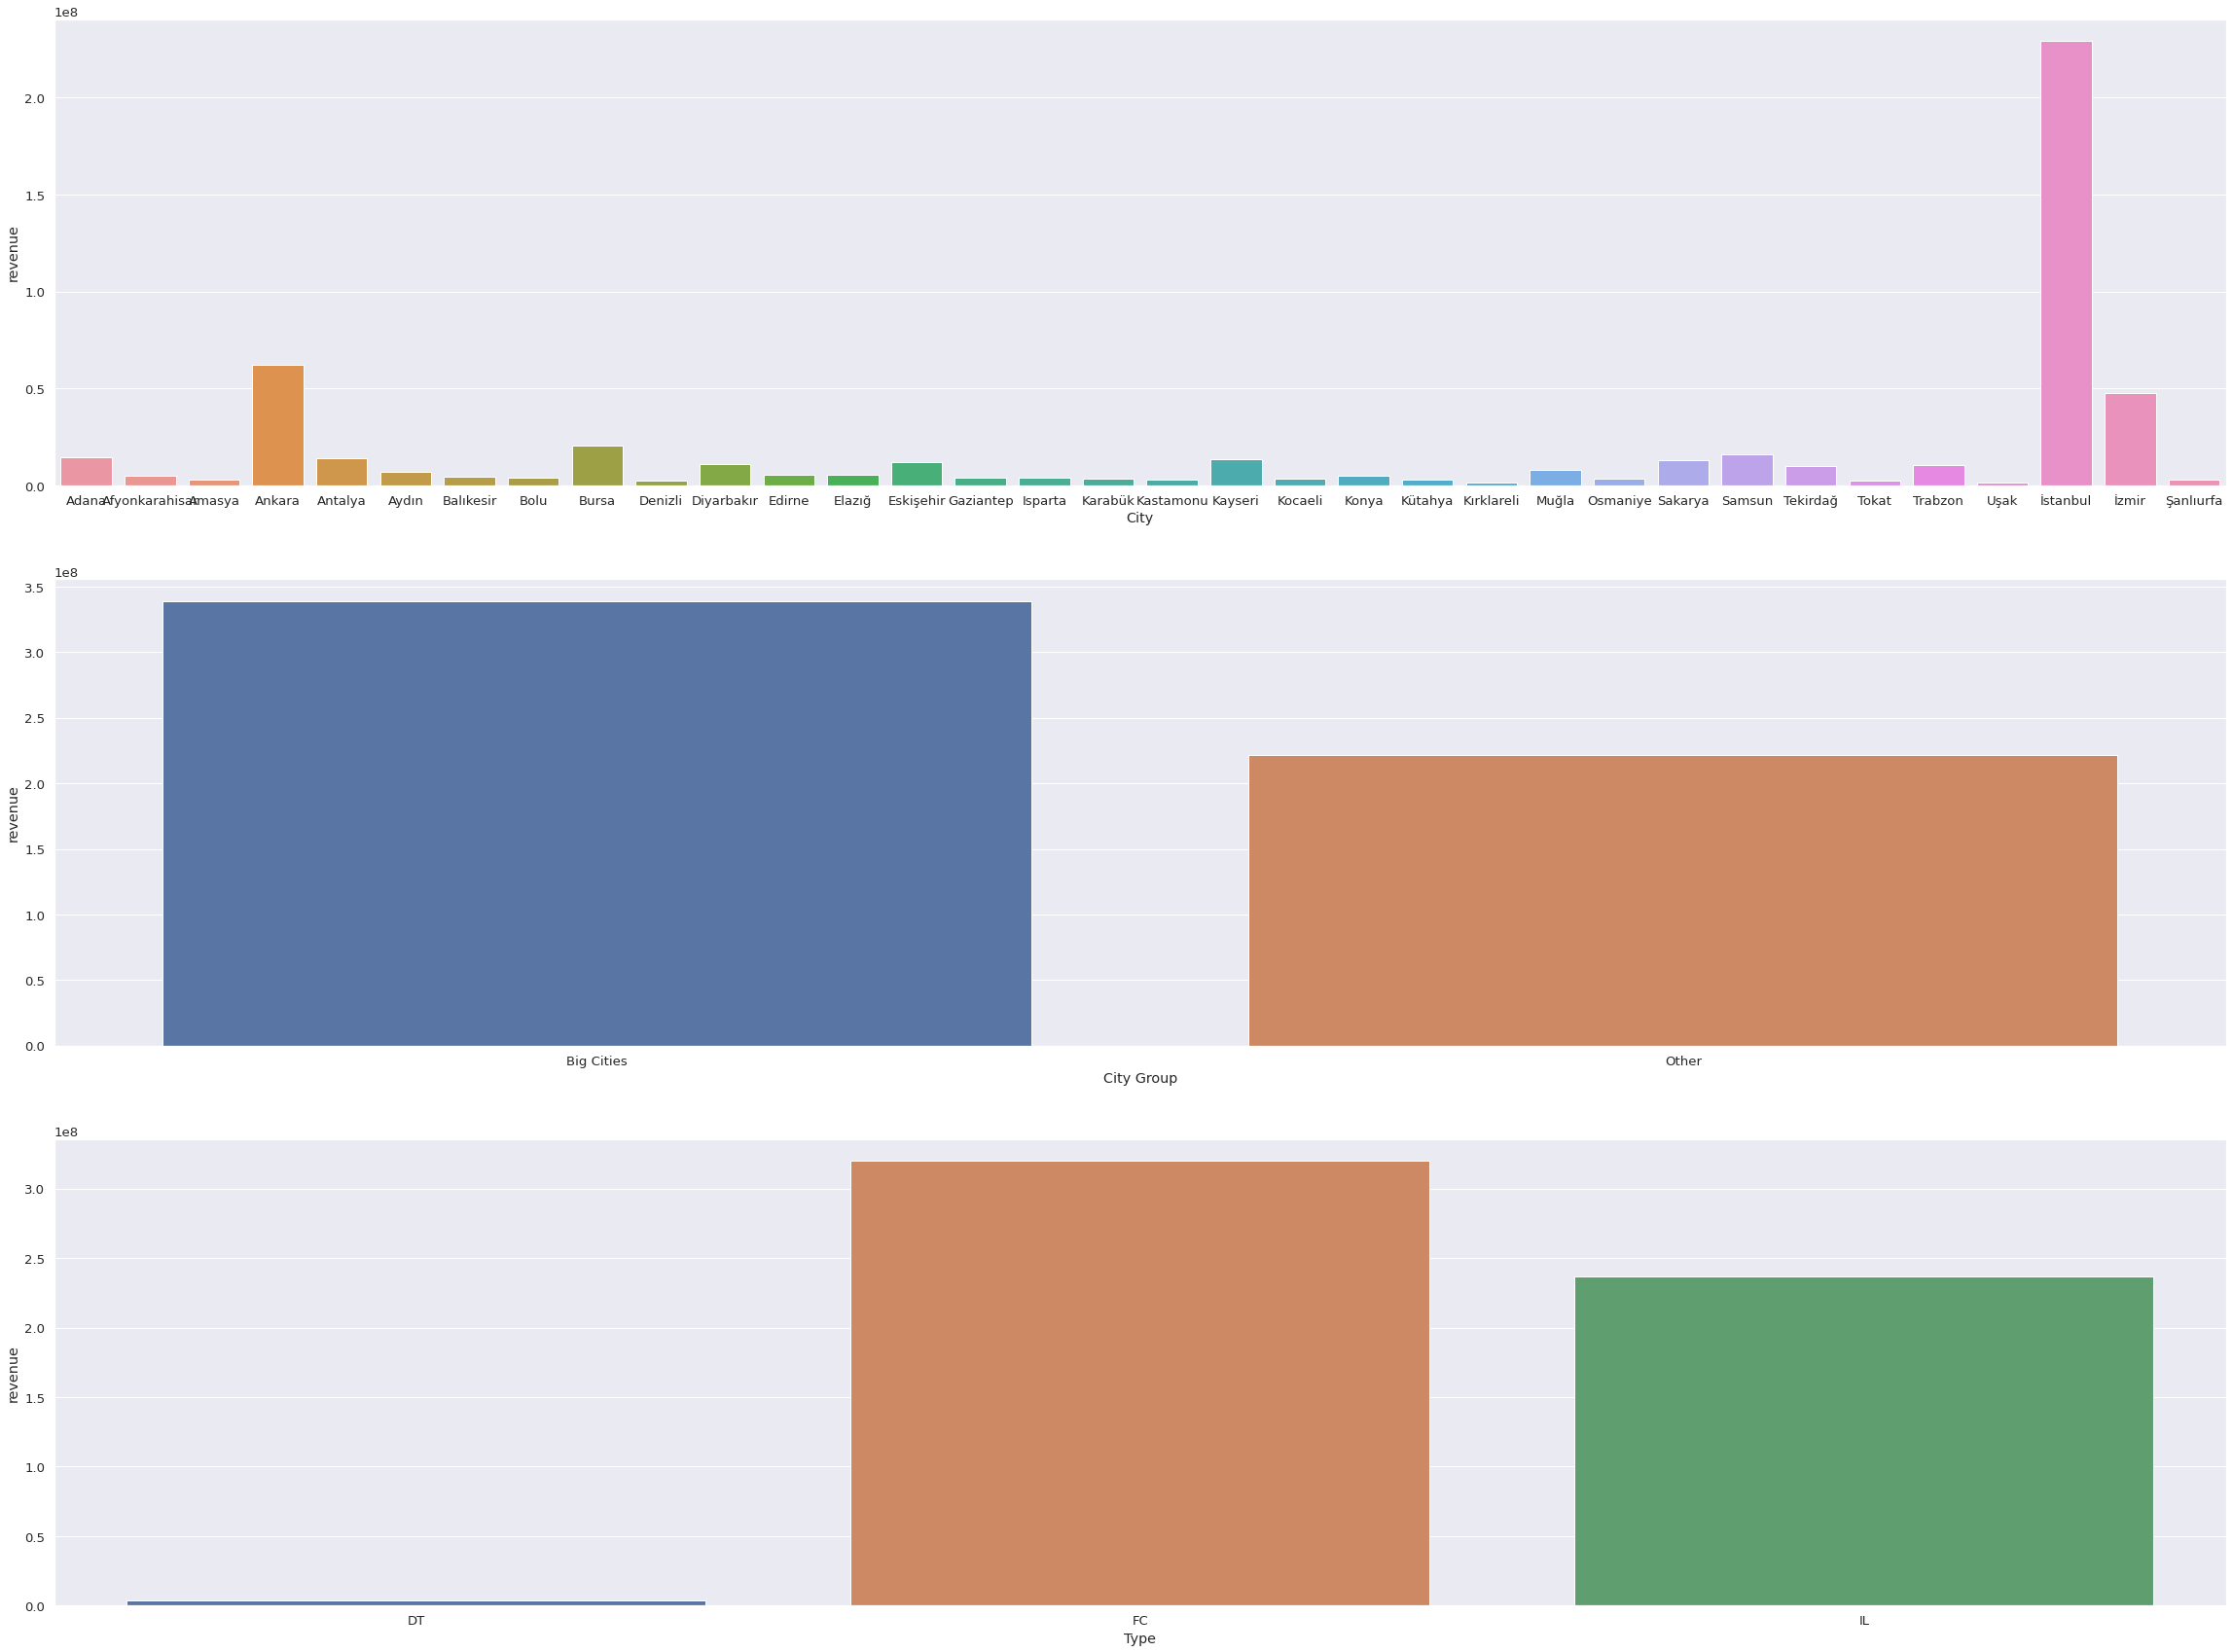

In [ ]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for cat_colum, subplot in zip(categorical_features, ax.flatten()):
  df = train.groupby(cat_colum)[['revenue']].sum()
  sns.barplot(data = df, y = 'revenue', x = df.index, ax=subplot)


Del anterior grafico se puede concluir que Estambul es la ciudad que mas ingresos generan en comparación a otras ciudades. Adicionalmente, se observa que es mejor abrir un restaurante de tipo FC seguido de un IL

**Análisis de las relaciones entre las variables numéricas y la variable objetivo**

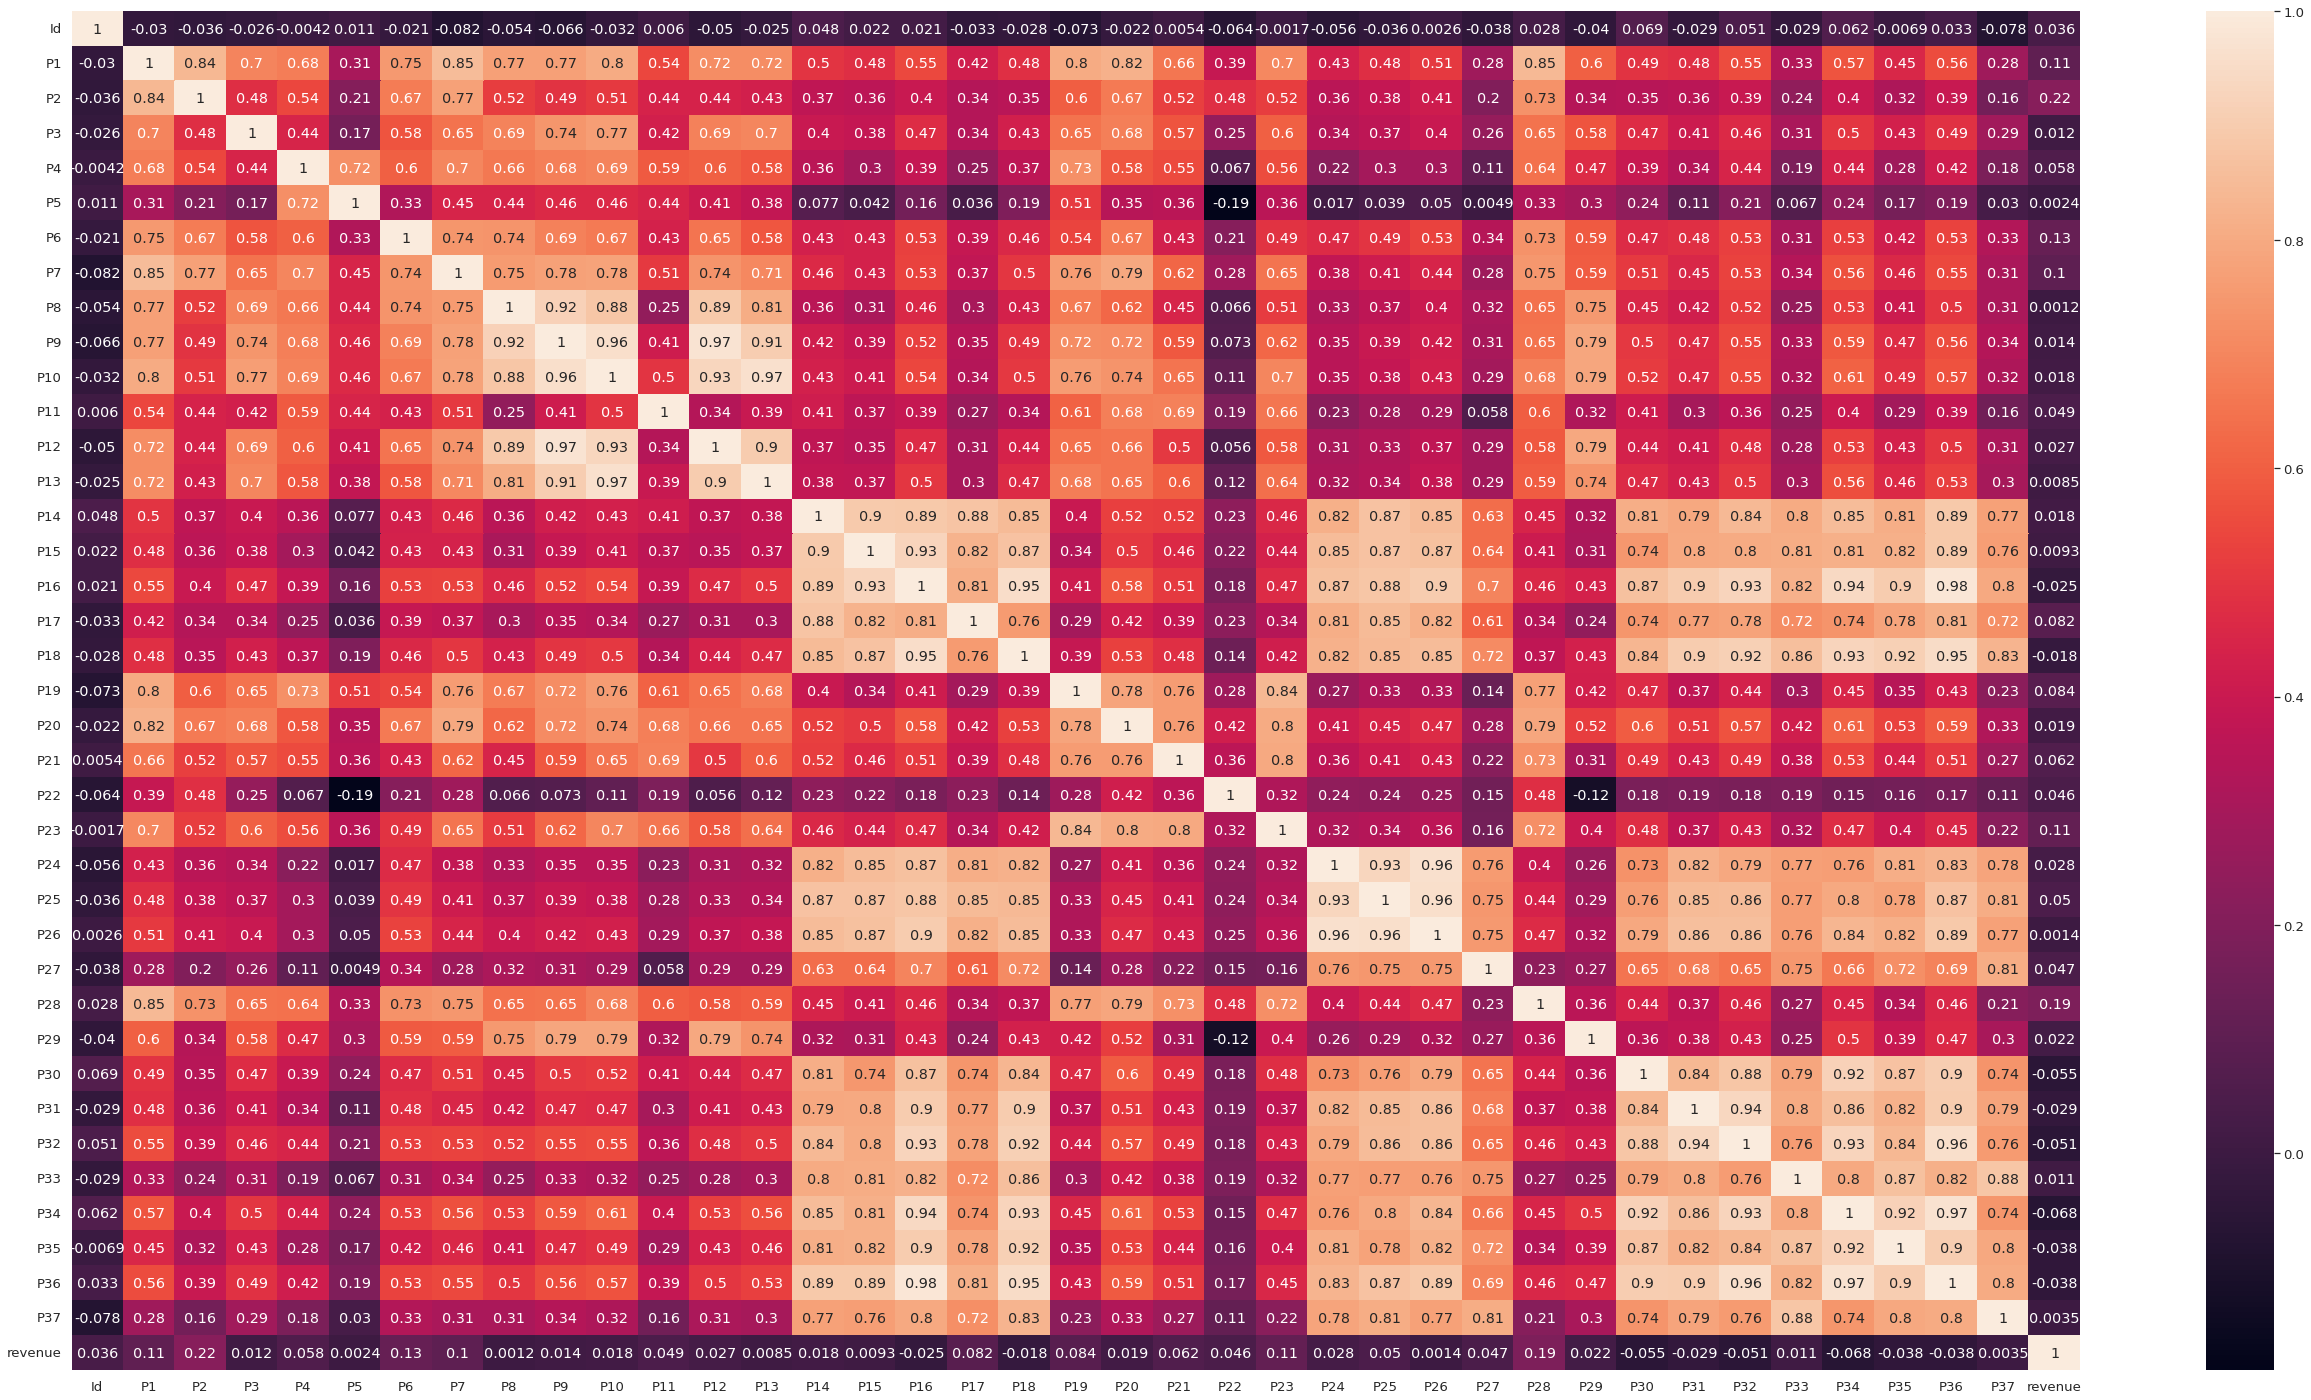

In [ ]:
plt.figure(figsize=(45,25))
sns.heatmap(train.corr(),annot=True)

El mapa de calor claramente no muestra una relación entre las variables numericas y la variable objetivo.

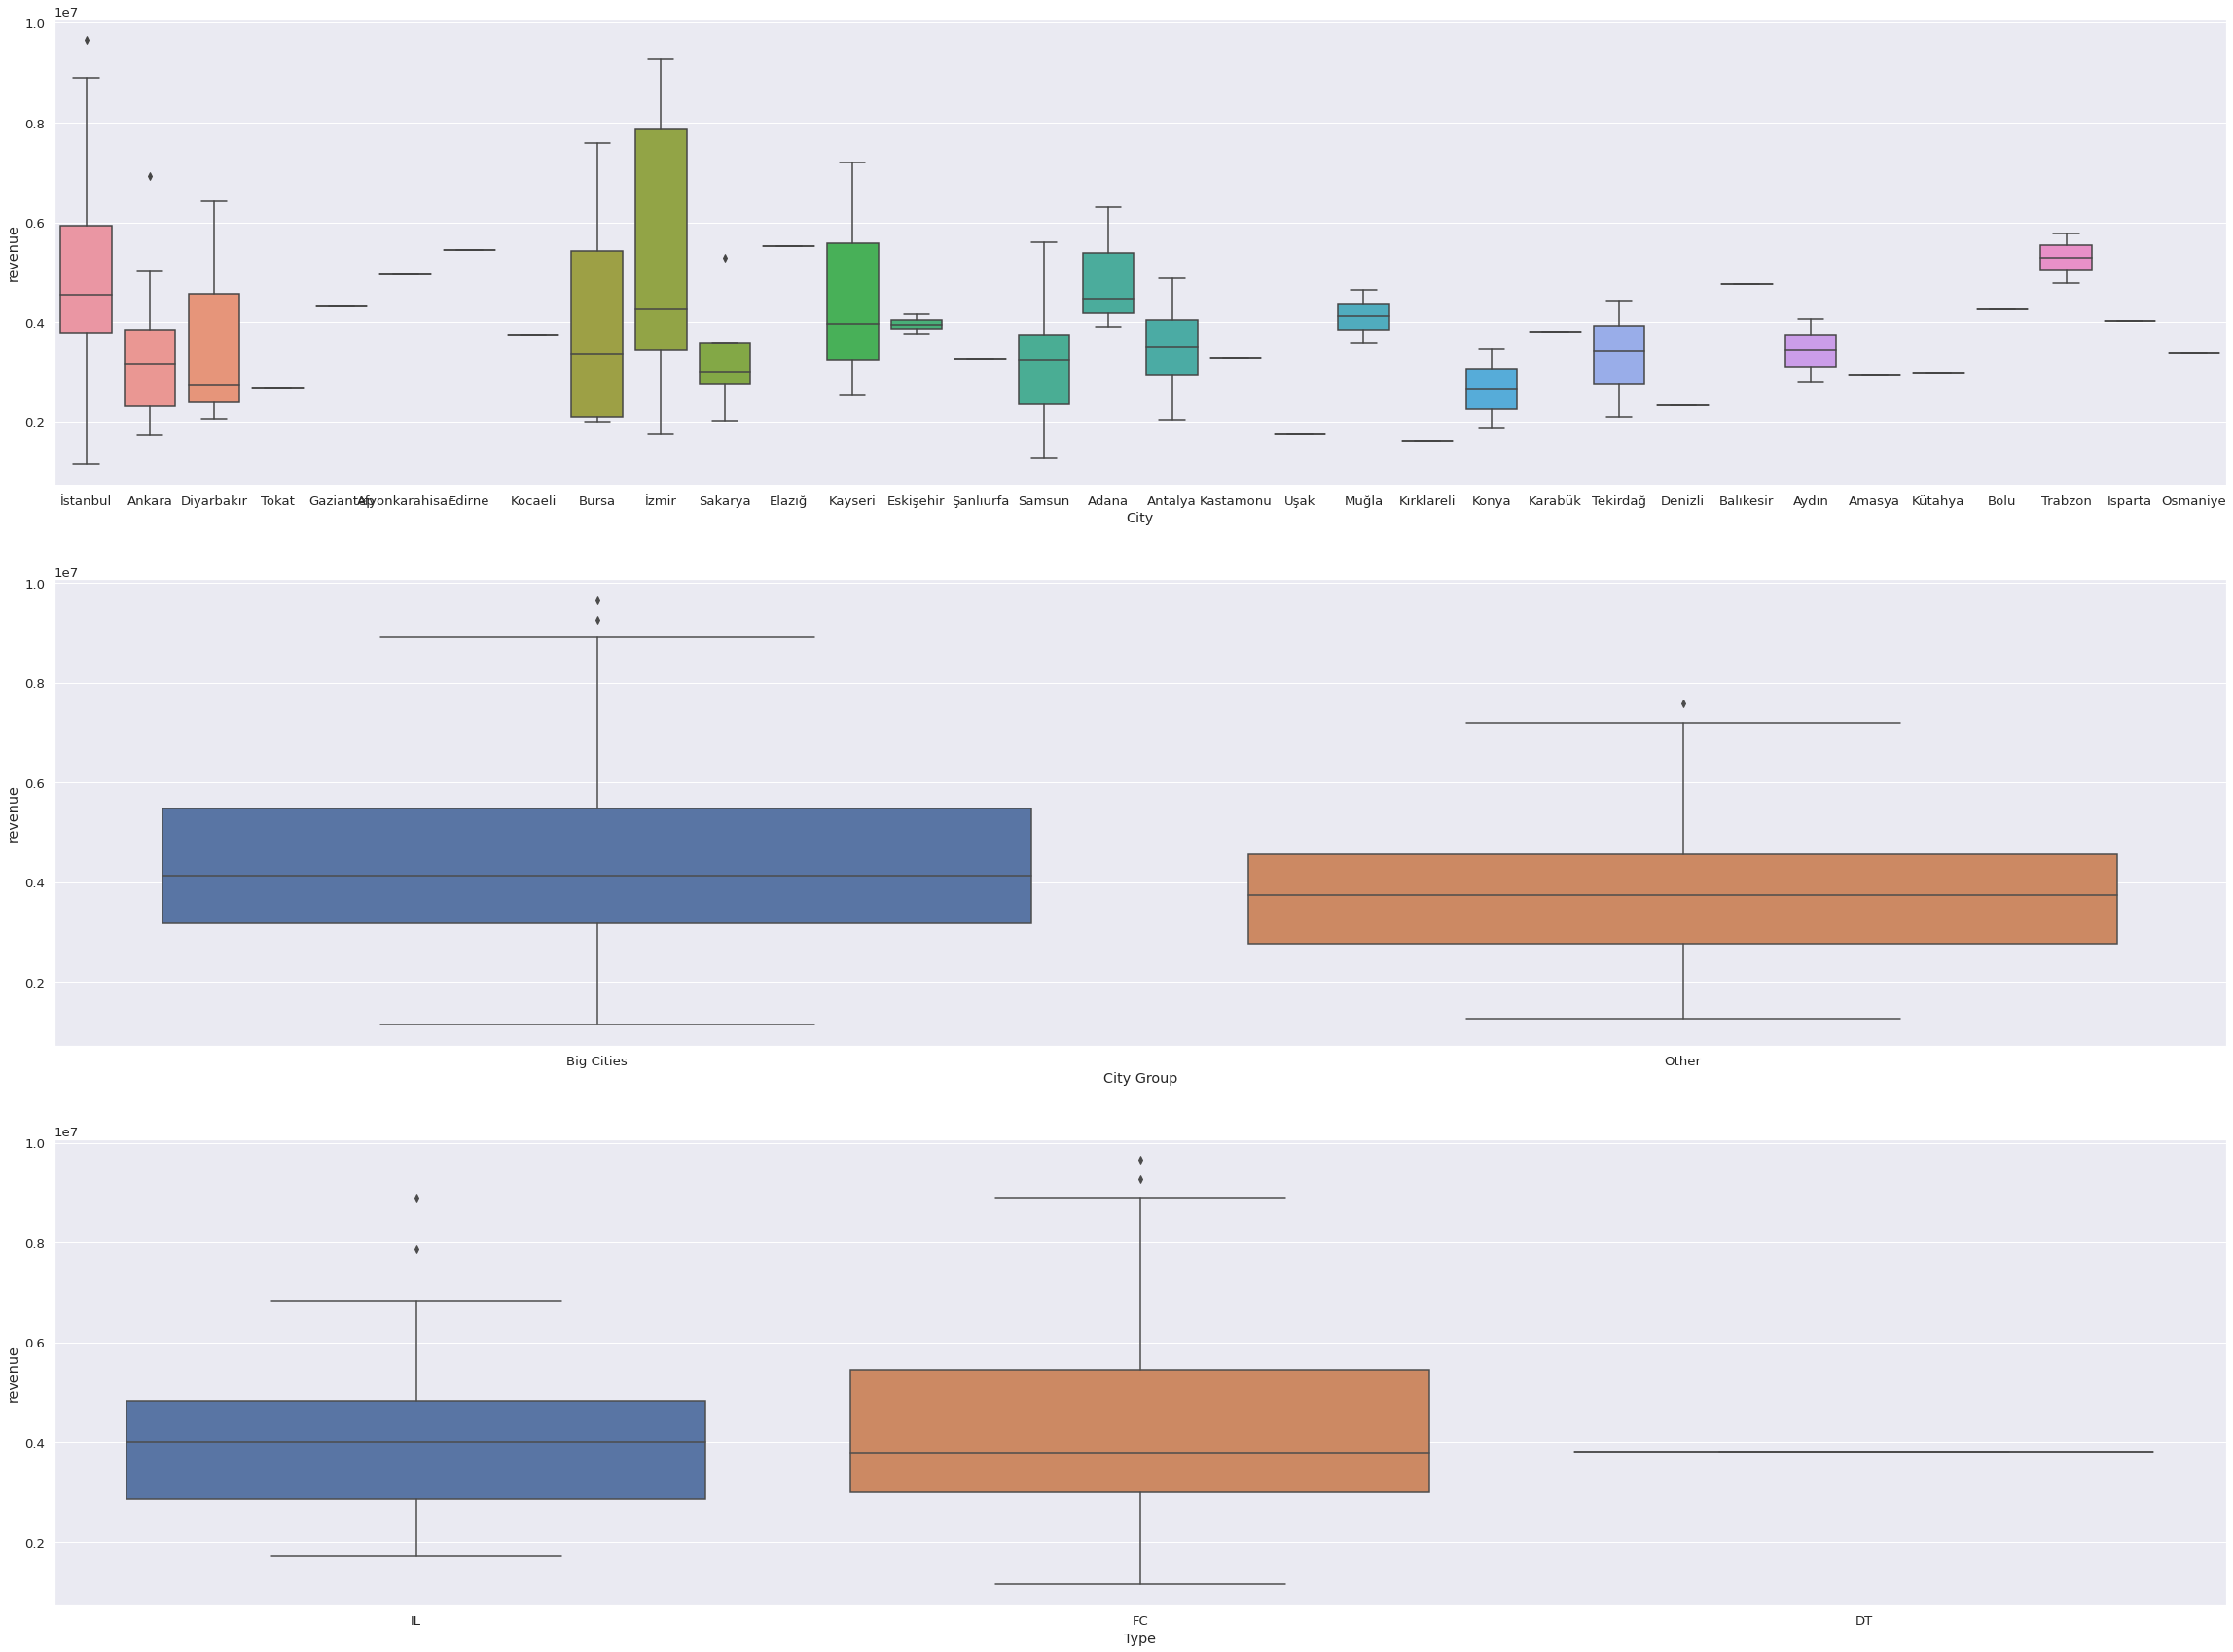

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for var, subplot in zip(categorical_features, ax.flatten()):
    sns.boxplot(x=var, y='revenue', data=train, ax=subplot)

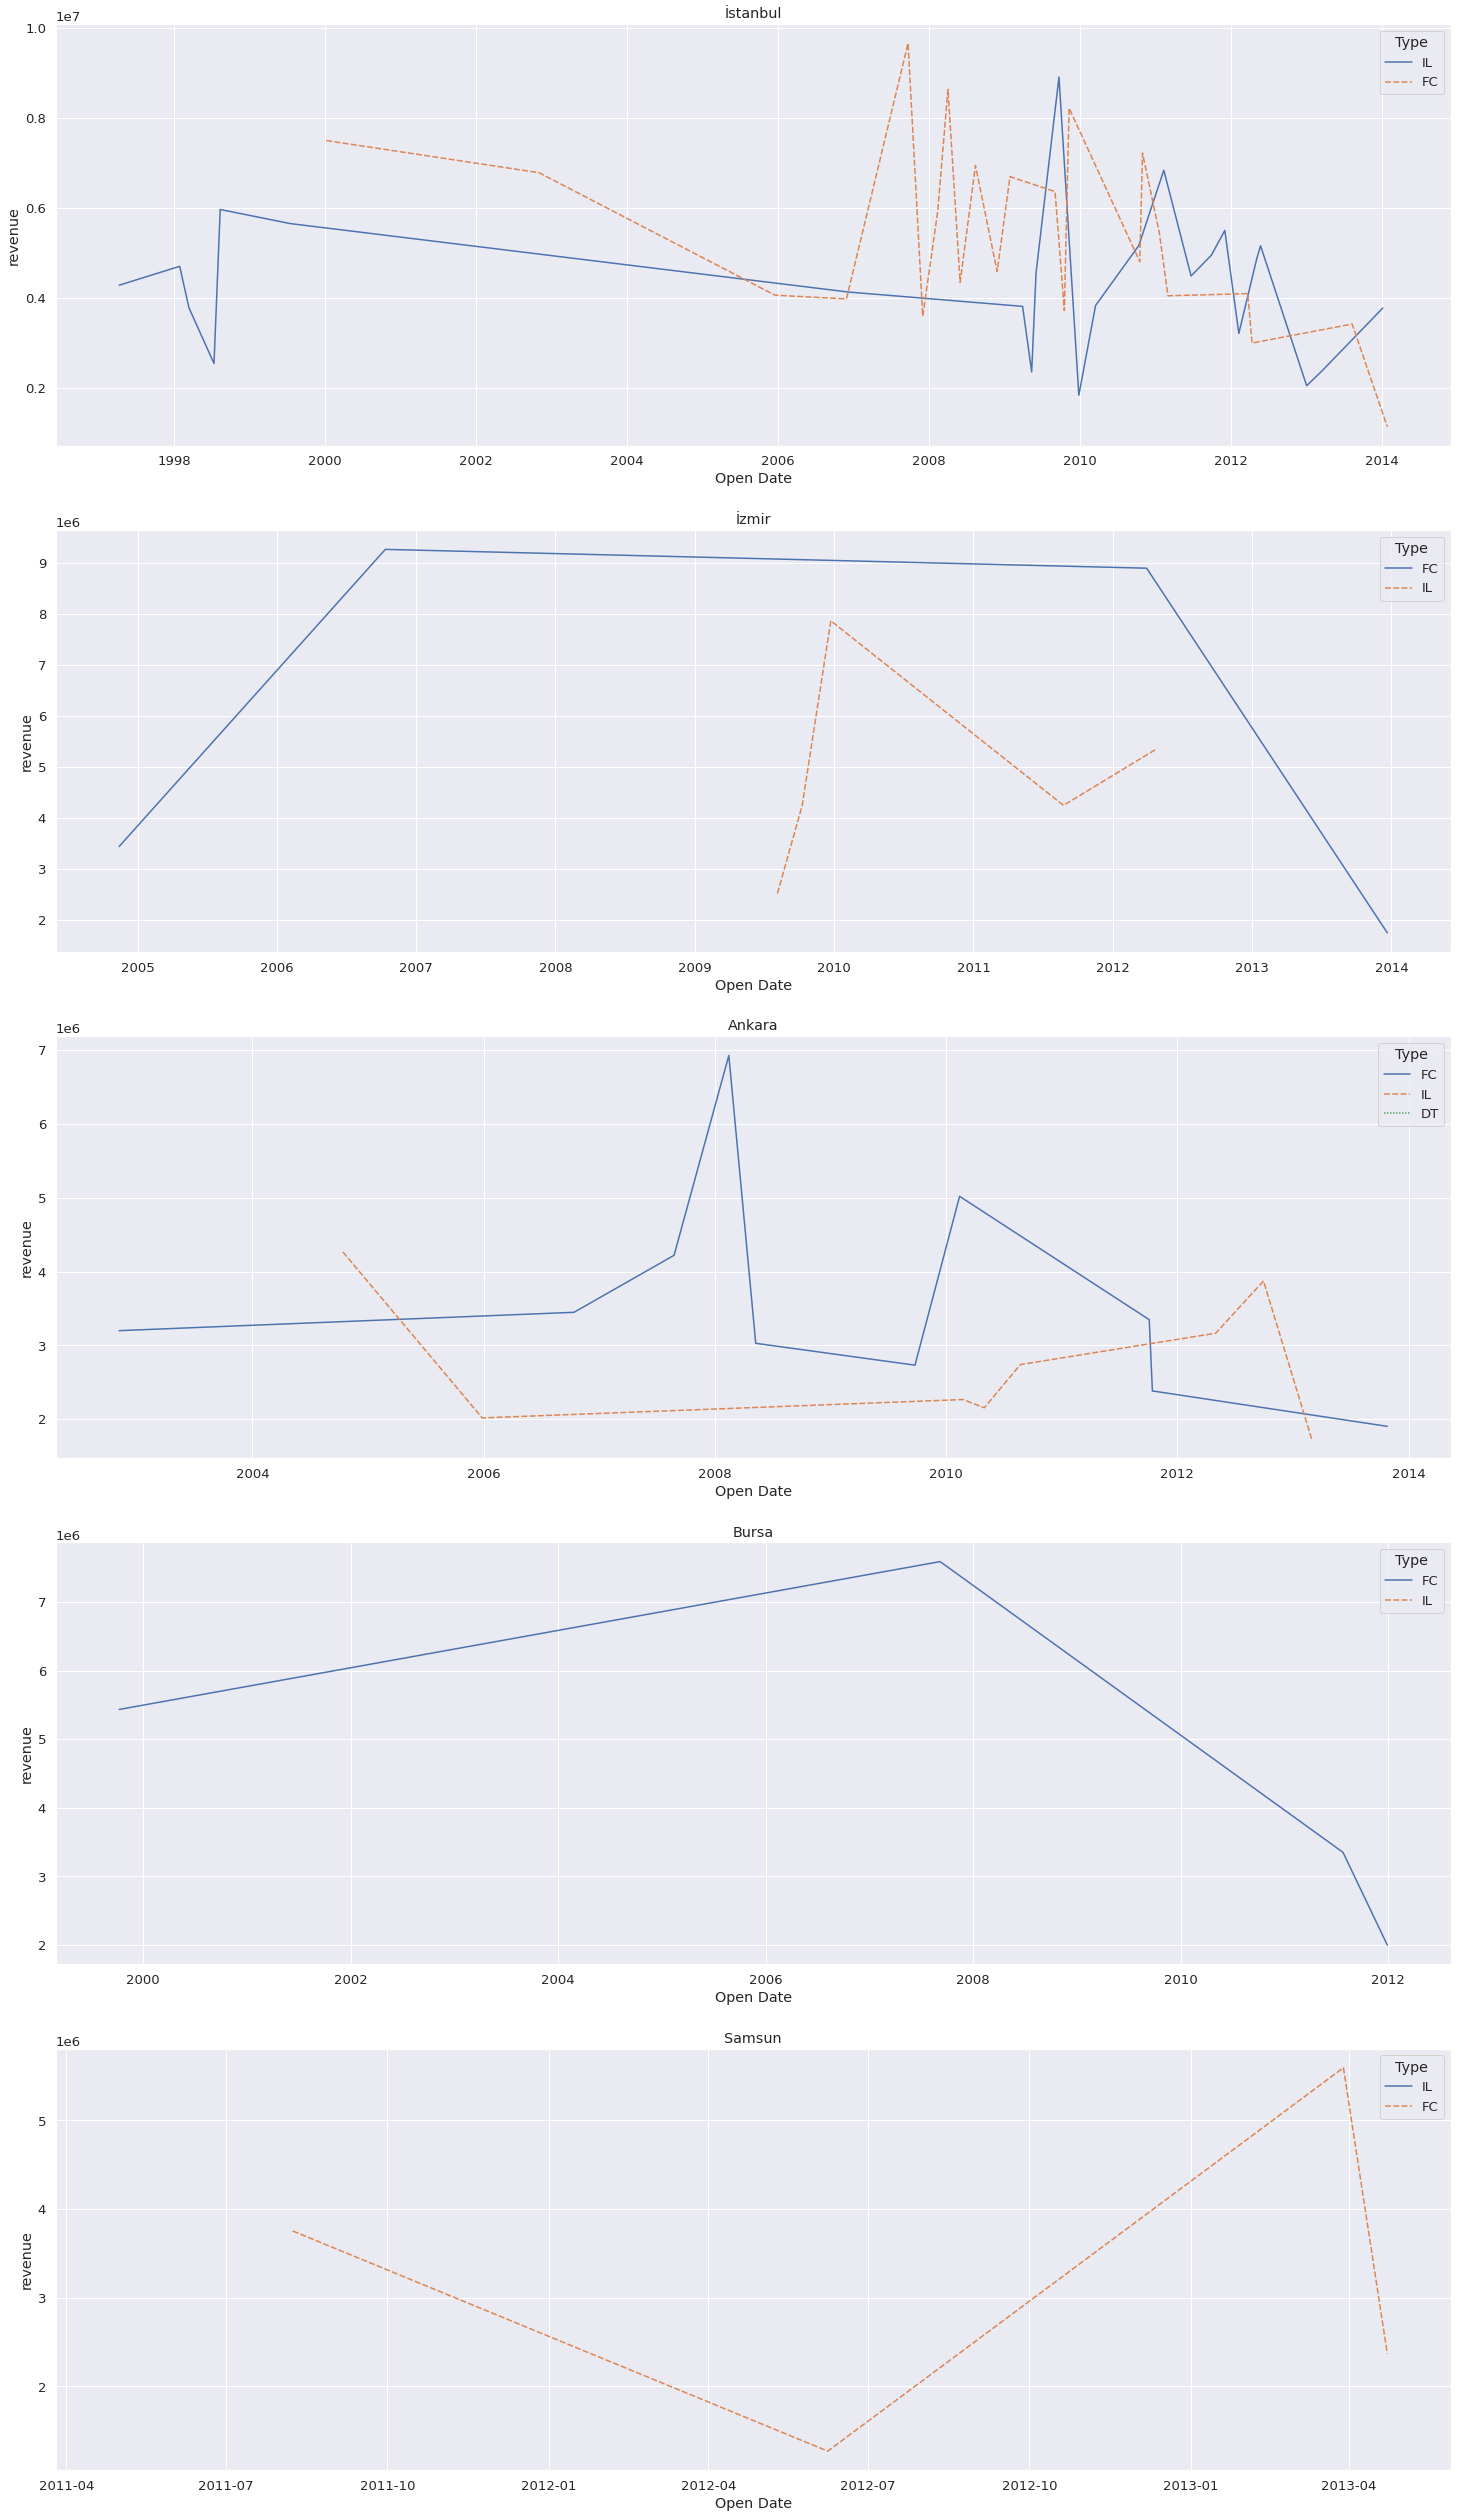

In [ ]:
cats = ['İstanbul','İzmir','Ankara','Bursa','Samsun']
fig, ax = plt.subplots(5, 1, figsize=(25, 45))
for variable, subplot in zip(cats, ax.flatten()):
  temp = train[train['City'] == variable].sort_values(by = 'Open Date')
  sns.lineplot(data = temp, x = 'Open Date', y = 'revenue', hue = 'Type', ax = subplot, style = "Type").set(title=variable)
  


Los graficos muestran que la mejor opción es abrir un restaurante de tipo IL en Estambul, ya que los revenue para el tipo de restaurante FC esta disminuyendo.

# Preparación de datos

In [ ]:
train['City'].unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [ ]:
test['City'].unique()

array(['Niğde', 'Konya', 'Ankara', 'Kocaeli', 'Afyonkarahisar',
       'Eskişehir', 'Rize', 'İstanbul', 'Trabzon', 'Antalya', 'Muğla',
       'Düzce', 'Adana', 'Bursa', 'Aydın', 'Hatay', 'Denizli', 'İzmir',
       'Gaziantep', 'Samsun', 'Erzurum', 'Edirne', 'Balıkesir', 'Mersin',
       'Zonguldak', 'Malatya', 'Çanakkale', 'Kars', 'Bolu', 'Batman',
       'Bilecik', 'Giresun', 'Tekirdağ', 'Sivas', 'Kırıkkale', 'Mardin',
       'Erzincan', 'Manisa', 'Diyarbakır', 'Kahramanmaraş', 'Yalova',
       'Tanımsız', 'Sakarya', 'Kırşehir', 'Aksaray', 'Kayseri',
       'Nevşehir', 'Çorum', 'Ordu', 'Kırklareli', 'Şanlıurfa', 'Artvin',
       'Uşak', 'Kütahya', 'Siirt', 'Çankırı', 'Isparta'], dtype=object)

In [ ]:
train.drop(['Id'], inplace = True, axis = 1)
test.drop(['Id'], inplace = True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
mean_revenue_per_city = train.groupby('City', as_index=False)[['revenue']].mean()
mean_revenue_per_city['revenue'] = mean_revenue_per_city['revenue'].apply(lambda x: int(x/1e6))
mean_revenue_per_city

,City,revenue
0,Adana,4
1,Afyonkarahisar,4
2,Amasya,2
3,Ankara,3
4,Antalya,3
5,Aydın,3
6,Balıkesir,4
7,Bolu,4
8,Bursa,4
9,Denizli,2


In [ ]:
mean_dict = dict(zip(mean_revenue_per_city['City'], mean_revenue_per_city['revenue']))
mean_dict

{'Adana': 4,
 'Afyonkarahisar': 4,
 'Amasya': 2,
 'Ankara': 3,
 'Antalya': 3,
 'Aydın': 3,
 'Balıkesir': 4,
 'Bolu': 4,
 'Bursa': 4,
 'Denizli': 2,
 'Diyarbakır': 3,
 'Edirne': 5,
 'Elazığ': 5,
 'Eskişehir': 3,
 'Gaziantep': 4,
 'Isparta': 4,
 'Karabük': 3,
 'Kastamonu': 3,
 'Kayseri': 4,
 'Kocaeli': 3,
 'Konya': 2,
 'Kütahya': 2,
 'Kırklareli': 1,
 'Muğla': 4,
 'Osmaniye': 3,
 'Sakarya': 3,
 'Samsun': 3,
 'Tekirdağ': 3,
 'Tokat': 2,
 'Trabzon': 5,
 'Uşak': 1,
 'İstanbul': 4,
 'İzmir': 5,
 'Şanlıurfa': 3}

In [ ]:
train.replace({"City":mean_dict}, inplace=True)
train

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17,4,Big Cities,IL,4,5.00,4.00,4.00,2,2,...,3.00,5,3,4,5,5,4,3,4,5653753.00
1,2008-02-14,3,Big Cities,FC,4,5.00,4.00,4.00,1,2,...,3.00,0,0,0,0,0,0,0,0,6923131.00
2,2013-03-09,3,Other,IL,2,4.00,2.00,5.00,2,3,...,3.00,0,0,0,0,0,0,0,0,2055379.00
3,2012-02-02,2,Other,IL,6,4.50,6.00,6.00,4,4,...,7.50,25,12,10,6,18,12,12,6,2675511.00
4,2009-05-09,4,Other,IL,3,4.00,3.00,4.00,2,2,...,3.00,5,1,3,2,3,4,3,3,4316715.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2008-06-25,5,Other,FC,2,3.00,3.00,5.00,4,2,...,3.00,0,0,0,0,0,0,0,0,5787594.00
130,2006-10-12,5,Big Cities,FC,4,5.00,4.00,4.00,2,3,...,3.00,0,0,0,0,0,0,0,0,9262754.00
131,2006-07-08,4,Other,FC,3,4.00,4.00,4.00,2,3,...,3.00,0,0,0,0,0,0,0,0,2544857.00
132,2010-10-29,4,Big Cities,FC,4,5.00,4.00,5.00,2,2,...,3.00,0,0,0,0,0,0,0,0,7217634.00


In [ ]:
train['City'].unique()

array([4, 3, 2, 5, 1])

In [ ]:
train['City'].mean()

3.6044776119402986

In [ ]:
test.replace({"City":mean_dict}, inplace=True)
test

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,2011-01-22,Niğde,Other,FC,1,4.00,4.00,4.00,1,2,...,2.00,3.00,0,0,0,0,0,0,0,0
1,2011-03-18,2,Other,IL,3,4.00,4.00,4.00,2,2,...,1.00,3.00,0,0,0,0,0,0,0,0
2,2013-10-30,3,Big Cities,FC,3,4.00,4.00,4.00,2,2,...,2.00,3.00,0,0,0,0,0,0,0,0
3,2013-05-06,3,Other,IL,2,4.00,4.00,4.00,2,3,...,2.00,3.00,0,4,0,0,0,0,0,0
4,2013-07-31,4,Other,FC,2,4.00,4.00,4.00,1,2,...,5.00,3.00,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2000-01-05,3,Other,FC,5,5.00,4.00,4.00,2,2,...,2.00,3.00,0,0,0,0,0,0,0,0
99996,2011-07-18,Niğde,Other,IL,1,2.00,4.00,3.00,1,1,...,1.00,3.00,5,0,0,0,4,0,0,0
99997,2012-12-29,4,Big Cities,IL,4,5.00,4.00,4.00,1,2,...,4.00,1.00,5,5,3,2,4,4,4,2
99998,2013-10-12,4,Big Cities,FC,12,7.50,6.00,6.00,4,4,...,7.50,5.00,0,0,0,4,0,0,0,0


In [ ]:
test['City'] = test['City'].apply(lambda x: 4 if isinstance(x,str) else x)
test

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,2011-01-22,4,Other,FC,1,4.00,4.00,4.00,1,2,...,2.00,3.00,0,0,0,0,0,0,0,0
1,2011-03-18,2,Other,IL,3,4.00,4.00,4.00,2,2,...,1.00,3.00,0,0,0,0,0,0,0,0
2,2013-10-30,3,Big Cities,FC,3,4.00,4.00,4.00,2,2,...,2.00,3.00,0,0,0,0,0,0,0,0
3,2013-05-06,3,Other,IL,2,4.00,4.00,4.00,2,3,...,2.00,3.00,0,4,0,0,0,0,0,0
4,2013-07-31,4,Other,FC,2,4.00,4.00,4.00,1,2,...,5.00,3.00,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2000-01-05,3,Other,FC,5,5.00,4.00,4.00,2,2,...,2.00,3.00,0,0,0,0,0,0,0,0
99996,2011-07-18,4,Other,IL,1,2.00,4.00,3.00,1,1,...,1.00,3.00,5,0,0,0,4,0,0,0
99997,2012-12-29,4,Big Cities,IL,4,5.00,4.00,4.00,1,2,...,4.00,1.00,5,5,3,2,4,4,4,2
99998,2013-10-12,4,Big Cities,FC,12,7.50,6.00,6.00,4,4,...,7.50,5.00,0,0,0,4,0,0,0,0


In [ ]:
import time
from datetime import datetime as dt
from sklearn import preprocessing

## prepartion function 
def prepare_data_frame(dataframe, target):
    df = dataframe.copy()

    #df[target].apply(np.log)

    ## Splittin the date column into three columns 
    #df['Open Date Year']  = df['Open Date'].dt.year
    #df['Open Date Month']  = df['Open Date'].dt.month
    #df['Open Date Day']  = df['Open Date'].dt.day
    ##---------------------------------------
    ## feature Engineering Begining 
    ##--------------------------------------
    ## feature Engineering a diff column 
    ## since when this resturant was opened
    all_diff = []
    for date in df["Open Date"]:
        diff = dt.now() - date
        all_diff.append(int(diff.days))
    df['Days_from_open'] = pd.Series(all_diff)
    ##---------------------------------------
    ## feature Engineering End 
    ##--------------------------------------
    # drop Open Date column s
    df = df.drop(['Open Date'], axis=1)
    # drop target column s
    if target in df.columns:
        #df[target] = df[target].apply(np.log)
        tar = df[target]
        df = df.drop([target], axis=1)
    else:
        tar = None
    # get numberical variables 
    num_vars = df.select_dtypes([np.number]).columns.tolist()
    # encoding categrical variables 
    #categorical variables already encoded in one hot encoding
    # get cat variables 
    cat_vars = df.select_dtypes(include='object').columns.tolist()
    df[cat_vars] = df[cat_vars].apply(preprocessing.LabelEncoder().fit_transform)
    #df.loc[:, "P1" :"P37"] = preprocessing.MinMaxScaler().fit_transform(df.loc[:, "P1" : "P37"])
    return (df,tar)


In [ ]:
X_train1,y_train1 = prepare_data_frame(train,'revenue')

In [ ]:
X_train1

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,Days_from_open
0,4,0,2,4,5.00,4.00,4.00,2,2,5,...,3.00,5,3,4,5,5,4,3,4,8493
1,3,0,1,4,5.00,4.00,4.00,1,2,5,...,3.00,0,0,0,0,0,0,0,0,5359
2,3,1,2,2,4.00,2.00,5.00,2,3,5,...,3.00,0,0,0,0,0,0,0,0,3509
3,2,1,2,6,4.50,6.00,6.00,4,4,10,...,7.50,25,12,10,6,18,12,12,6,3910
4,4,1,2,3,4.00,3.00,4.00,2,2,5,...,3.00,5,1,3,2,3,4,3,3,4909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,5,1,1,2,3.00,3.00,5.00,4,2,4,...,3.00,0,0,0,0,0,0,0,0,5227
130,5,0,1,4,5.00,4.00,4.00,2,3,5,...,3.00,0,0,0,0,0,0,0,0,5849
131,4,1,1,3,4.00,4.00,4.00,2,3,5,...,3.00,0,0,0,0,0,0,0,0,5945
132,4,0,1,4,5.00,4.00,5.00,2,2,5,...,3.00,0,0,0,0,0,0,0,0,4371


In [ ]:
y_train1

0     5653753.00
1     6923131.00
2     2055379.00
3     2675511.00
4     4316715.00
         ...    
129   5787594.00
130   9262754.00
131   2544857.00
132   7217634.00
133   6363241.00
Name: revenue, Length: 134, dtype: float64

In [ ]:
X_test1,y_test1 = prepare_data_frame(test,'revenue')

In [ ]:
X_test1

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,Days_from_open
0,4,1,1,1,4.00,4.00,4.00,1,2,5,...,3.00,0,0,0,0,0,0,0,0,4286
1,2,1,2,3,4.00,4.00,4.00,2,2,5,...,3.00,0,0,0,0,0,0,0,0,4231
2,3,0,1,3,4.00,4.00,4.00,2,2,5,...,3.00,0,0,0,0,0,0,0,0,3274
3,3,1,2,2,4.00,4.00,4.00,2,3,5,...,3.00,0,4,0,0,0,0,0,0,3451
4,4,1,1,2,4.00,4.00,4.00,1,2,5,...,3.00,0,0,0,0,0,0,0,0,3365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,1,1,5,5.00,4.00,4.00,2,2,5,...,3.00,0,0,0,0,0,0,0,0,8321
99996,4,1,2,1,2.00,4.00,3.00,1,1,1,...,3.00,5,0,0,0,4,0,0,0,4109
99997,4,0,2,4,5.00,4.00,4.00,1,2,5,...,1.00,5,5,3,2,4,4,4,2,3579
99998,4,0,1,12,7.50,6.00,6.00,4,4,10,...,5.00,0,0,0,4,0,0,0,0,3292


In [ ]:
from sklearn.ensemble import RandomForestRegressor

cls = RandomForestRegressor(n_estimators=150)
cls.fit(X_train1, y_train1)
pred = cls.predict(X_test1)
pred = np.exp(pred)
cls.score(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


0.8889085369641132

In [ ]:
predic = cls.predict(X_train1)
predic = np.exp(predic)
train['predictions'] = predic
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,predictions
0,1999-07-17,4,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,5,3,4,5,5,4,3,4,5653753.0,5.143365e+06
1,2008-02-14,3,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,6923131.0,5.178689e+06
2,2013-03-09,3,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,0,0,2055379.0,1.963558e+06
3,2012-02-02,2,Other,IL,6,4.5,6.0,6.0,4,4,...,25,12,10,6,18,12,12,6,2675511.0,2.918221e+06
4,2009-05-09,4,Other,IL,3,4.0,3.0,4.0,2,2,...,5,1,3,2,3,4,3,3,4316715.0,4.147946e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2008-06-25,5,Other,FC,2,3.0,3.0,5.0,4,2,...,0,0,0,0,0,0,0,0,5787594.0,5.210012e+06
130,2006-10-12,5,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,0,0,0,0,0,0,0,0,9262754.0,7.614499e+06
131,2006-07-08,4,Other,FC,3,4.0,4.0,4.0,2,3,...,0,0,0,0,0,0,0,0,2544857.0,3.046881e+06
132,2010-10-29,4,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,0,0,0,0,0,0,0,0,7217634.0,6.396642e+06


In [ ]:
predictions = cls.predict(X_test1)
predictions = np.exp(predictions)
X_test1['Prediction'] = predictions

In [ ]:
X_test1.drop(['Prediction'], inplace = True, axis = 1)

# MODELS

In [ ]:
test_label = pd.read_csv('/content/sampleSubmission.csv')
test_label

,Id,Prediction
0,0,4453532.60
1,1,4453532.60
2,2,4453532.60
3,3,4453532.60
4,4,4453532.60
...,...,...
99995,99995,4453532.60
99996,99996,4453532.60
99997,99997,4453532.60
99998,99998,4453532.60


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.model_selection import train_test_split

def FitModels(X_train, y_train, X_test, algorithm, params):
  global gpred
  X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

  grid =  GridSearchCV(estimator = algorithm, param_grid=params, cv = 5, n_jobs = 1, verbose = 1)

  grid_result = grid.fit(X_train, y_train)
  best_params = grid_result.best_params_
  pred = grid_result.predict(X_test)
  #pred = np.exp(pred)

  ##############################################
  grid_result = grid.fit(X_train1, y_train1)
  pred1 = grid_result.predict(X_test1)    
  rmse = sqrt(mean_squared_error(y_test1, pred1))
  ###################################

  print(f'RMSE ON TRAIN DATA {rmse}')

  label_list = test_label['Prediction'].tolist()

  print(f'Best params: {best_params}')
  print(f'Root Mean Squared Error {sqrt(mean_squared_error(label_list, pred))}')

  pred_test = grid_result.predict(X_test)
  #pred_test = np.exp(pred_test)
  gpred = pred_test
  diffe = label_list - pred_test

  res_df = pd.concat([pd.Series(pred_test), pd.Series(label_list), pd.Series(diffe)], axis = 1)
  res_df.columns = ['Prediction', 'True Data', 'Diff']
  print()
  print('******************** MSE BASED on ORIGINAL TEST DATA *********************')
  print(f'Root Mean Squared Error {sqrt(mean_squared_error(label_list, pred_test))}')
  print('******************** Prediction vs ORIGINAL TEST DATA *********************')
  print(res_df.head(10))


pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#AdaBoost Regressor

from sklearn.ensemble import AdaBoostRegressor

params_AdaBoost = {
    "n_estimators": [10, 30, 50, 100],
    "learning_rate": [.01, 0.1, 0.5, 0.9, 0.95, 1],
}

FitModels(X_train1, y_train1, X_test1, AdaBoostRegressor(), params_AdaBoost)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
RMSE ON TRAIN DATA 1646076.1073321823
Best params: {'learning_rate': 0.01, 'n_estimators': 100}
Root Mean Squared Error 886180.3656363009

******************** MSE BASED on ORIGINAL TEST DATA *********************
Root Mean Squared Error 866026.4412683232
******************** Prediction vs ORIGINAL TEST DATA *********************
   Prediction  True Data       Diff
0  3966610.54 4453532.60  486922.06
1  3572853.04 4453532.60  880679.56
2  3088323.60 4453532.60 1365209.00
3  3572853.04 4453532.60  880679.56
4  4006736.70 4453532.60  446795.90
5  3966610.54 4453532.60  486922.06
6  3655360.25 4453532.60  798172.35
7  4006736.70 4453532.60  446795.90
8  4006736.70 4453532.60  446795.90
9  3814607.48 4453532.60  638925.12


In [ ]:
# Random Forest

params_RF = {
  "n_estimators": [50, 100, 150, 200, 300, 400, 500, 600, 700, 1000],    
}

FitModels(X_train1, y_train1, X_test1, RandomForestRegressor(), params_RF)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
RMSE ON TRAIN DATA 1687507.774342022
Best params: {'n_estimators': 600}
Root Mean Squared Error 939939.0124220736

******************** MSE BASED on ORIGINAL TEST DATA *********************
Root Mean Squared Error 772793.2419370115
******************** Prediction vs ORIGINAL TEST DATA *********************
   Prediction  True Data       Diff
0  5039637.14 4453532.60 -586104.54
1  2984010.80 4453532.60 1469521.80
2  3109202.70 4453532.60 1344329.90
3  3312387.30 4453532.60 1141145.30
4  4681796.72 4453532.60 -228264.12
5  3651557.24 4453532.60  801975.36
6  3964691.12 4453532.60  488841.48
7  3634600.02 4453532.60  818932.58
8  4330191.18 4453532.60  123341.42
9  4192120.70 4453532.60  261411.90


In [ ]:
from sklearn.svm import SVR

param_SVR ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModels(X_train1, y_train1, X_test1, SVR(), param_SVR)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
RMSE ON TRAIN DATA 1835341.2648755522
Best params: {'C': 1000, 'gamma': 0.0001}
Root Mean Squared Error 565212.1796148142

******************** MSE BASED on ORIGINAL TEST DATA *********************
Root Mean Squared Error 580145.5963666519
******************** Prediction vs ORIGINAL TEST DATA *********************
   Prediction  True Data      Diff
0  3876704.68 4453532.60 576827.92
1  3874881.63 4453532.60 578650.97
2  3870185.52 4453532.60 583347.08
3  3870975.33 4453532.60 582557.27
4  3869768.06 4453532.60 583764.54
5  3873289.04 4453532.60 580243.56
6  3875874.15 4453532.60 577658.45
7  3870463.19 4453532.60 583069.41
8  3873593.47 4453532.60 579939.13
9  3873743.83 4453532.60 579788.77
